In [37]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

In [43]:
df = pd.read_csv("./frame_anno1_anno2.csv", names=["frame", "anno1", "anno2"])
glove = []
for index, row in df.iterrows():
    frame = row['frame']
    name = os.path.basename(frame)
    glove.append("GL" in name)

df["GL"] = glove
df.head()
print(len(df[df["GL"] == True]))
print(len(df[df["GL"] == False]))

1172
156


(822, 978, 1112, 1078)
(749, 733, 874, 982)


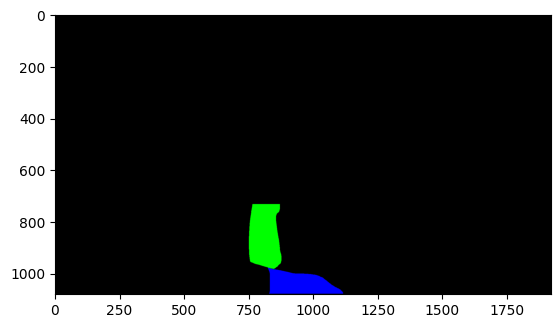

In [35]:
frame_path = "Annotations\Test_Subject_1\By_1\id\Jenga_task\Side_View\Jenga_GL_3374.0.png"
frame = cv2.imread(frame_path) # BGR

def get_coors(frame):
    n_rows, n_cols = frame.shape[:2]
    x_min, y_min, x_max, y_max = 0, 0, 0, 0

    for i in range(n_cols):
        if frame[:, i].sum() > 0:
            x_min = i
            break

    for i in reversed(range(n_cols)):
        if frame[:, i].sum() > 0:
            x_max = i
            break

    for i in range(n_rows):
        if frame[i].sum() > 0:
            y_min = i
            break

    for i in reversed(range(n_rows)):
        if frame[i].sum() > 0:
            y_max = i
            break
    return x_min, y_min, x_max, y_max


print(get_coors(frame[:, :, 0]))
print(get_coors(frame[:, :, 1]))
plt.imshow(frame[:,:,::-1])
plt.show()

In [44]:
from ultralytics import YOLO

model = YOLO('yolov8n.yaml').load('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 7.59MB/s]

Transferred 355/355 items from pretrained weights
